### Preparing dataframes for R

In [2]:
# Enabling R
%reload_ext rpy2.ipython

/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [3]:
%%R
library(survival)

dfOri = read.table("tmp/RR.csv", header=T, sep=",")

In [4]:
%%R
# Dataset local copies
df = dfOri

estado_civil_lbl = c("Solteira", "Casada", "Viúva", "Separada/divorciada", "União estável")
escolaridade_lbl = c("Nenhuma", "1 a 3 anos", "4 a 7 anos", "8 a 11 anos", "12 ou mais")
raca_cor_lbl = c("Branca", "Preta", "Amarela", "Parda", "Indígena")
sexo_lbl = c("Masculino", "Feminino")
parto_lbl = c("Vaginal", "Cesário")
assistencia_nasc_lbl = c("Médico","Enfermeira","Parteira","Outros")
preenchimento_dnv_lbl = c("Médico","Enfermeiro","Parteira","Funcionário do cartório","Outros")

# Addind value labels
df$estado_civil <- factor(df$estado_civil, labels = estado_civil_lbl)
df$escolaridade <- factor(df$escolaridade, labels = escolaridade_lbl)
df$raca_cor <- factor(df$raca_cor, labels = raca_cor_lbl)
df$sexo <- factor(df$sexo, labels = sexo_lbl)
df$parto <- factor(df$parto, labels = parto_lbl)
df$assistencia_nasc <- factor(df$assistencia_nasc, labels = assistencia_nasc_lbl)
df$preenchimento_dnv <- factor(df$preenchimento_dnv, labels = preenchimento_dnv_lbl)

cat('Dimensões do Dataset (linhas x colunas):\n')
cat(dim(df))

cat('\n\nDistribuição entre as classes (0 - sobreviventes X 1 - mortes neonatais):\n')
cat(table(df$status))

Dimensões do Dataset (linhas x colunas):
96074 16

Distribuição entre as classes (0 - sobreviventes X 1 - mortes neonatais):
95515 559

In [5]:
%%R
names(df)

 [1] "X"                  "ano"                "ini"               
 [4] "fim"                "tempo"              "status"            
 [7] "idade"              "estado_civil"       "escolaridade"      
[10] "raca_cor"           "sexo"               "parto"             
[13] "gestacoes"          "consultas_prenatal" "assistencia_nasc"  
[16] "preenchimento_dnv" 


### Topico

In [6]:
%%R
print(levels(df$sexo))
print(levels(df$escolaridade))
print(levels(df$raca_cor))
print(levels(df$parto))
print(levels(df$estado_civil))


[1] "Masculino" "Feminino" 
[1] "Nenhuma"     "1 a 3 anos"  "4 a 7 anos"  "8 a 11 anos" "12 ou mais" 
[1] "Branca"   "Preta"    "Amarela"  "Parda"    "Indígena"
[1] "Vaginal" "Cesário"
[1] "Solteira"            "Casada"              "Viúva"              
[4] "Separada/divorciada" "União estável"      


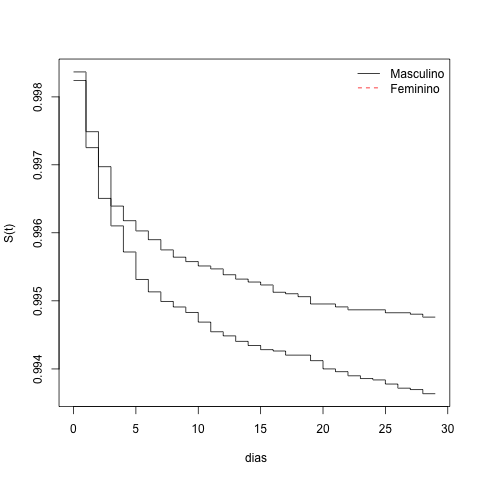

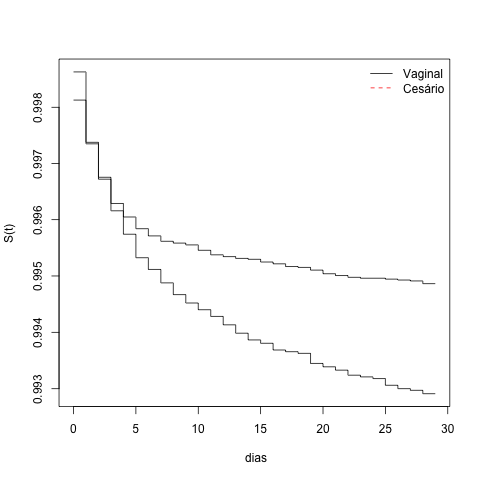

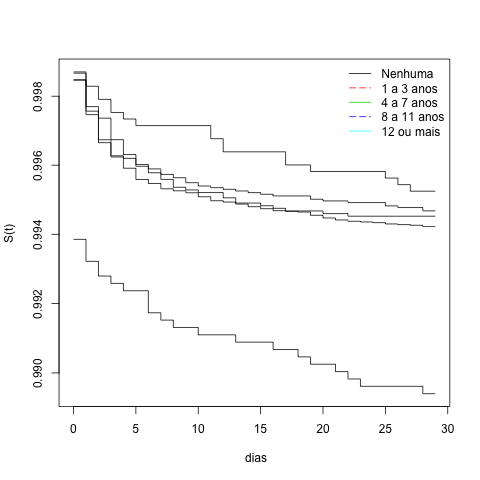

In [7]:
%%R
#Variável dependente

y<-Surv(df$tempo, df$status)

# Kaplan-Meyer Estratificado
estrat.KMsexo<-survfit(y ~ sexo, data=df)
estrat.KMparto<-survfit(y ~ parto, data=df)
estrat.KM_escolaridade<-survfit(y ~ escolaridade, data=df)

plot (estrat.KMsexo, conf.int=F, xlab=" dias",  ylab="S(t)",mark.time=F, log='y')
legend (x="topright", legend=sexo_lbl, lty = c(1,2), col = 1:2, bty="n")
        
plot (estrat.KMparto, conf.int=F, xlab=" dias",  ylab="S(t)",mark.time=F, log='y')
legend (x="topright", legend=parto_lbl, lty = c(1,2), col = 1:2, bty="n")

plot (estrat.KM_escolaridade, conf.int=F, xlab=" dias",  ylab="S(t)",mark.time=F, log='y')
legend (x="topright", legend=escolaridade_lbl, lty = c(1,5), col = 1:5, bty="n")


Valores estimados da verosemelhança parcial (coef) é positivo para o fator partoCesário, logo indica que a variável contribuem para aumento do risco; e negativo para o fator sexoFeminio,indica que a fator contribuem para redução do risco ao longo do tempo de sobrevivência. Assim, podemos concluir que o parto cesário contribui para o risco e que individuos do sexo feminino tem seu risco diminuido ao longo do tempo (sobrevivem mais que indivíduos do sexo masculino), considerando que p-value rejeita h0.

In [8]:
%%R
#Estimando o modelo
modelo1<-coxph(y~sexo+parto, data=df, x=TRUE)
summary(modelo1)

Call:
coxph(formula = y ~ sexo + parto, data = df, x = TRUE)

  n= 96074, number of events= 559 

                 coef exp(coef) se(coef)      z Pr(>|z|)    
sexoFeminino -0.19153   0.82570  0.08529 -2.246  0.02472 *  
partoCesário  0.32036   1.37762  0.08554  3.745  0.00018 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

             exp(coef) exp(-coef) lower .95 upper .95
sexoFeminino    0.8257     1.2111    0.6986    0.9759
partoCesário    1.3776     0.7259    1.1650    1.6291

Concordance= 0.553  (se = 0.012 )
Likelihood ratio test= 19  on 2 df,   p=8e-05
Wald test            = 19.24  on 2 df,   p=7e-05
Score (logrank) test = 19.38  on 2 df,   p=6e-05



Valores estimados da verosemelhança parcial (coef) é positivo para o fator partoCesário, logo indica que a variável contribuem para aumento do risco; e negativo para o fator sexoFeminino, indica que a fator contribuem para redução do risco ao longo do tempo de sobrevivência. Assim, podemos concluir que o parto cesário contribui para o risco e que individuos do sexo feminino tem seu risco diminuido ao longo do tempo (sobrevivem mais que indivíduos do sexo masculino), considerando que p-value rejeita h0. Os modelos combinado os a variáveis sexo+escolaridade, parto+escolaridade e sexo+parto+escolaridade, podemos observar o mesmo indicativa com relação aos fatores partoCesário e sexoFeminino. Os resultados da execução do modelo de COX estão apresentado a seguir.

In [9]:
%%R
#Estimando o modelo
modelo2<-coxph(y~sexo+escolaridade, data=df, x=TRUE)
summary(modelo2)

Call:
coxph(formula = y ~ sexo + escolaridade, data = df, x = TRUE)

  n= 96074, number of events= 559 

                            coef exp(coef) se(coef)      z Pr(>|z|)    
sexoFeminino            -0.19518   0.82268  0.08528 -2.289 0.022099 *  
escolaridade1 a 3 anos  -0.80663   0.44636  0.24495 -3.293 0.000991 ***
escolaridade4 a 7 anos  -0.69294   0.50011  0.17032 -4.068 4.73e-05 ***
escolaridade8 a 11 anos -0.61150   0.54254  0.15272 -4.004 6.22e-05 ***
escolaridade12 ou mais  -0.66450   0.51453  0.18409 -3.610 0.000307 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                        exp(coef) exp(-coef) lower .95 upper .95
sexoFeminino               0.8227      1.216    0.6960    0.9724
escolaridade1 a 3 anos     0.4464      2.240    0.2762    0.7214
escolaridade4 a 7 anos     0.5001      2.000    0.3582    0.6983
escolaridade8 a 11 anos    0.5425      1.843    0.4022    0.7318
escolaridade12 ou mais     0.5145      1.944    0.3587    0.7381

Conc

In [10]:
%%R
#Estimando o modelo
modelo3<-coxph(y~parto+escolaridade, data=df, x=TRUE)
summary(modelo3)

Call:
coxph(formula = y ~ parto + escolaridade, data = df, x = TRUE)

  n= 96074, number of events= 559 

                            coef exp(coef) se(coef)      z Pr(>|z|)    
partoCesário             0.40471   1.49887  0.08983  4.505 6.63e-06 ***
escolaridade1 a 3 anos  -0.87492   0.41690  0.24556 -3.563 0.000367 ***
escolaridade4 a 7 anos  -0.77635   0.46008  0.17160 -4.524 6.06e-06 ***
escolaridade8 a 11 anos -0.73915   0.47752  0.15594 -4.740 2.14e-06 ***
escolaridade12 ou mais  -0.90006   0.40654  0.19210 -4.685 2.79e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                        exp(coef) exp(-coef) lower .95 upper .95
partoCesário               1.4989     0.6672    1.2569    1.7874
escolaridade1 a 3 anos     0.4169     2.3987    0.2576    0.6746
escolaridade4 a 7 anos     0.4601     2.1735    0.3287    0.6440
escolaridade8 a 11 anos    0.4775     2.0942    0.3518    0.6482
escolaridade12 ou mais     0.4065     2.4598    0.2790    0.5924

Con

In [11]:
%%R
#Estimando o modelo
modelo4<-coxph(y~sexo+parto+escolaridade, data=df, x=TRUE)
summary(modelo4)

Call:
coxph(formula = y ~ sexo + parto + escolaridade, data = df, x = TRUE)

  n= 96074, number of events= 559 

                            coef exp(coef) se(coef)      z Pr(>|z|)    
sexoFeminino            -0.19198   0.82532  0.08529 -2.251 0.024386 *  
partoCesário             0.40301   1.49632  0.08985  4.485 7.28e-06 ***
escolaridade1 a 3 anos  -0.87583   0.41652  0.24557 -3.566 0.000362 ***
escolaridade4 a 7 anos  -0.77674   0.45991  0.17162 -4.526 6.01e-06 ***
escolaridade8 a 11 anos -0.74051   0.47687  0.15597 -4.748 2.06e-06 ***
escolaridade12 ou mais  -0.90046   0.40638  0.19213 -4.687 2.78e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                        exp(coef) exp(-coef) lower .95 upper .95
sexoFeminino               0.8253     1.2116    0.6983    0.9755
partoCesário               1.4963     0.6683    1.2547    1.7845
escolaridade1 a 3 anos     0.4165     2.4009    0.2574    0.6740
escolaridade4 a 7 anos     0.4599     2.1744    0.3285 

### Anova (Comparando modelos)



In [12]:
%%R
anova(modelo1, modelo2)

Analysis of Deviance Table
 Cox model: response is  y
 Model 1: ~ sexo + parto
 Model 2: ~ sexo + escolaridade
   loglik  Chisq Df P(>|Chi|)
1 -6402.2                    
2 -6400.4 3.6031  3    0.3076


In [13]:
%%R
anova(modelo1, modelo3)

Analysis of Deviance Table
 Cox model: response is  y
 Model 1: ~ sexo + parto
 Model 2: ~ parto + escolaridade
   loglik  Chisq Df P(>|Chi|)    
1 -6402.2                        
2 -6393.1 18.207  3 0.0003986 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [14]:
%%R
anova(modelo2, modelo3)

Analysis of Deviance Table
 Cox model: response is  y
 Model 1: ~ sexo + escolaridade
 Model 2: ~ parto + escolaridade
   loglik  Chisq Df P(>|Chi|)    
1 -6400.4                        
2 -6393.1 14.604  0 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [15]:
%%R
anova(modelo1, modelo2, modelo4)

Analysis of Deviance Table
 Cox model: response is  y
 Model 1: ~ sexo + parto
 Model 2: ~ sexo + escolaridade
 Model 3: ~ sexo + parto + escolaridade
   loglik   Chisq Df P(>|Chi|)    
1 -6402.2                         
2 -6400.4  3.6031  3    0.3076    
3 -6390.6 19.7047  1 9.038e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Deviance (Comparando modelos)



In [16]:
%%R
mod.nulo = coxph(y~1, data=df)
summary(mod.nulo)

Call:  coxph(formula = y ~ 1, data = df)

Null model
  log likelihood= -6411.71 
  n= 96074 


In [17]:
%%R
#mod.saturado = coxph(y~factor(X), data=df)
#summary(mod.saturado)

# Probabilidade de concordancia
#summary(modelo4)


NULL


In [18]:
%%R
# Sobrevivencia por indice de prognostico
#source("Rfun.r")

#par(mfrow=c(2,2))
#plot.pi(modelo1, main="M1")
#plot.pi(modelo2, main="M2")
#plot.pi(modelo3, main="M3")
#plot.pi(modelo4, main="M$")#


NULL


### Análise de Resíduos


In [ ]:
%%R
# SCHOENFELD
residuo.sch<-cox.zph(modelo1)
par(mfrow=c(2,1))
print(residuo.sch)
plot(residuo.sch)

In [ ]:
%%R
# SCHOENFELD
residuo.sch<-cox.zph(modelo2)
print(residuo.sch)
par(mfrow=c(3,2))
plot(residuo.sch)

In [38]:
%%R
# SCHOENFELD
pdf(file="img/residuo_schoenfeld.pdf")
residuo.sch<-cox.zph(modelo4)
print(residuo.sch)
par(mfrow=c(3,2))
plot(residuo.sch)
dev.off()

                            rho  chisq        p
sexoFeminino            -0.0516  1.487 2.23e-01
partoCesário             0.1920 22.637 1.96e-06
escolaridade1 a 3 anos   0.0973  5.323 2.10e-02
escolaridade4 a 7 anos   0.0881  4.310 3.79e-02
escolaridade8 a 11 anos  0.0657  2.475 1.16e-01
escolaridade12 ou mais   0.0198  0.234 6.29e-01
GLOBAL                       NA 34.060 6.55e-06
quartz_off_screen 
                4 


In [ ]:
%%R
# MARTINGALE 
# Gráfico 1 (outlier)
par(mfrow=c(2,2))

res.mart<-resid(modelo1, type="martingale")
plot(res.mart, xlab="Indice", ylab="Resíduo", log='y')
abline(h=0, lty=2)
identify(res.mart)

res.mart<-resid(modelo2, type="martingale")
plot(res.mart, xlab="Indice", ylab="Resíduo", log='y')
abline(h=0, lty=2)
identify(res.mart)

res.mart<-resid(modelo4, type="martingale")
plot(res.mart, xlab="Indice", ylab="Resíduo", log='y')
abline(h=0, lty=2)
identify(res.mart)

In [ ]:
%%R


In [37]:
%%R
pdf(file="img/residuo_forma_funcional.pdf")
# Gráfico 2 (forma funcional)
par(mfrow=c(2,2))

modelo.nulo<-coxph(y~1, data=df)
res.nulo<-resid(modelo.nulo, type="martingale")

plot(df$sexo,res.nulo)
lines(lowess(df$sexo, res.nulo, iter=0), lty=2)
lines(lowess(df$sexo, res.nulo), lty=3)
legend("bottom", lty=c(2,3), legend = c("Com outlier","Sem outlier"))

plot(df$parto,res.nulo)
lines(lowess(df$parto, res.nulo, iter=0), lty=2)
lines(lowess(df$parto, res.nulo), lty=3)
legend("bottom", lty=c(2,3), legend = c("Com outlier","Sem outlier"))

plot(df$escolaridade,res.nulo)
lines(lowess(df$escolaridade, res.nulo, iter=0), lty=2)
lines(lowess(df$escolaridade, res.nulo), lty=3)
legend("bottom", lty=c(2,3), legend = c("Com outlier","Sem outlier"))

plot(df$idade,res.nulo)
lines(lowess(df$idade, res.nulo, iter=0), lty=2)
lines(lowess(df$idade, res.nulo), lty=3)
legend("bottom", lty=c(2,3), legend = c("Com outlier","Sem outlier"))
dev.off()

quartz_off_screen 
                4 


### Topico

In [36]:
%%R
pdf(file="img/residuos.pdf")
# reséduo x valor predito (deviance)
par(mfrow=c(2,2))

#pdf(file="img/residuo_martingale.pdf")
# MARTINGALE 
res.mart<-resid(modelo4, type="martingale")
plot(res.mart, xlab="Indice", ylab="Resíduo",
     main="Resíduo de martingale - Modelo 4", cex.axis=.75, cex.main=.75,  cex.lab=.75)
abline(h=0, lty=2)
identify(res.mart)
#dev.off()

# Res�duo Deviance
res.dev<-resid(modelo4, type="deviance")
plot(res.dev,
      main="Resíduo Deviance - Modelo 4", cex.axis=.75, cex.main=.75,  cex.lab=.75)
abline(h=0)
##

plot(res.dev, predict(modelo4),  
      main="Resíduo x valor predito (deviance) - Modelo 4", cex.axis=.75, cex.main=.75,  cex.lab=.75)
abline(h=0)
identify(res.dev, predict(modelo4))

#gráfico quantil-quantil
qqnorm(res.dev )
qqline(res.dev, lty=3,
        main="Quantil-quantil - Modelo 4", cex.axis=.75, cex.main=.75,  cex.lab=.75)
identify(res.dev)

#df[c(11,79,54,57,95),]
dev.off()

quartz_off_screen 
                4 


In [35]:
%%R
#Res�duo escore
pdf(file="img/residuo_escore.pdf")
res.esco<-resid(modelo4, type="dfbetas")
par(mfrow=c(3,1))
plot(df$sexo,res.esco[,2], xlab="Sexo", ylab="Resíduos",
     main="Resíduo Escore - sexo", cex.axis=.75, cex.main=.75,  cex.lab=.75)
plot(df$parto,res.esco[,2],xlab="Tipo de Parto",ylab="Resíduos",
     main="Resíduo Escore - parto", cex.axis=.75, cex.main=.75,  cex.lab=.75)
plot(df$escolaridade,res.esco[,2],xlab="Escolaridade",ylab="Resíduos",
     main="Resíduo Escore - escolaridade", cex.axis=.75, cex.main=.75,  cex.lab=.75)
dev.off()

quartz_off_screen 
                4 
